# Download umap libraries



In [ ]:
!pip install umap-learn[plot]
# !pip install holoviews
# !pip install -U ipykernel

     |████████████████████████████████| 86 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 10.6 MB/s 
     |████████████████████████████████| 15.8 MB 38.4 MB/s 
     |████████████████████████████████| 76 kB 6.2 MB/s 
     |████████████████████████████████| 132 kB 44.7 MB/s 
     |████████████████████████████████| 802 kB 44.6 MB/s 
     |████████████████████████████████| 802 kB 31.5 MB/s 
     |████████████████████████████████| 793 kB 29.7 MB/s 
     |████████████████████████████████| 793 kB 11.3 MB/s 
     |████████████████████████████████| 791 kB 40.6 MB/s 
     |████████████████████████████████| 786 kB 52.9 MB/s 
     |████████████████████████████████| 779 kB 28.1 MB/s 
     |████████████████████████████████| 778 kB 27.8 MB/s 
     |████████████████████████████████| 776 kB 36.9 MB/s 
     |████████████████████████████████| 769 kB 26.2 MB/s 
     |████████████████████████████████| 766 kB 27.5 MB/s 
     |████████████████████████████████| 1.0 MB 19.6 MB/s 
     |███████████

# Load MNIST dataset

In [ ]:
# import the mnist digits using tensorflow
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# - display data shapes
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
print('\n')

11501568/11490434 [==============================] - 0s 0us/step
MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)




Sample #: 46244
MNIST Number: 5




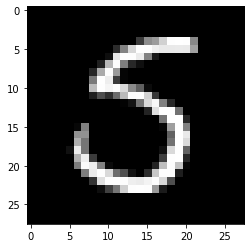

In [ ]:
# - randomly pick a sample image
# sample = np.random.randint(low=0, high=len(X_train))
# - pick a sample image
import matplotlib.pyplot as plt
import numpy as np

sample = 46244
print('Sample #: ' + str(sample))
print('MNIST Number: ' + str(Y_train[sample]))
print('\n')
image = X_train[sample]

# - plot the sample image
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

# UMAP

Once imported the MNIST digits, we can use the UMAP reducer on the MNIST training set images to create an embedding.

In [ ]:
# import the UMAP library
import umap

# create a UMAP reducer that will compress the data
reducer = umap.UMAP()

# get information about number of samples, rows, and columns in the dataset. 
# note the shape of each variable in the output above 
nsamples, nx, ny = X_train.shape

# reshape the data to comply with UMAP reducer requirements
X_train_2 = X_train.reshape((nsamples,nx*ny))

# create an embedding using the fit_transform function. 
embedding = reducer.fit_transform(X_train_2)

# display the embedding shape
print(np.shape(embedding))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(60000, 2)


The embedding, in this case, contains the compressed dataset in 2 dimensional Euclidian space. Lets look at a simple plot of this embedding:

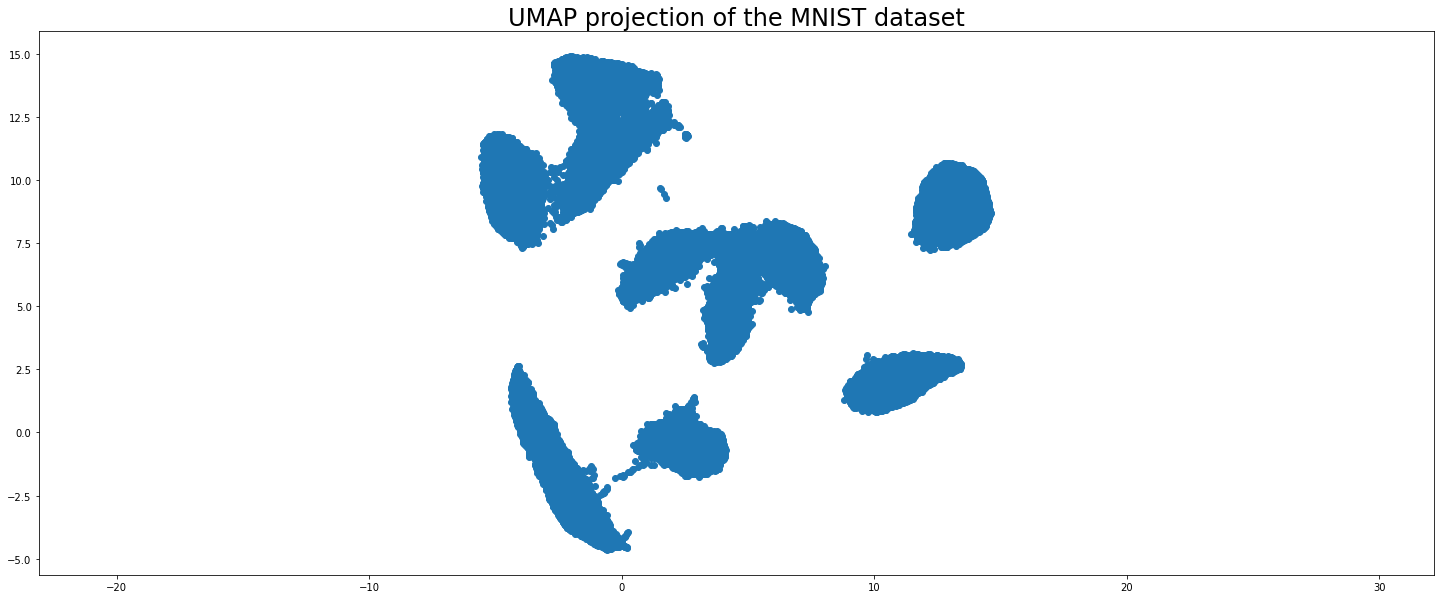

In [ ]:
plt.figure(figsize=[25,10])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.show()

The 2D embedding shows that there is some structure to this dataset (as expected). Data points that are close together should be more similar than those that are far apart. Lets color code each data point using its known numerical value in Y_train.

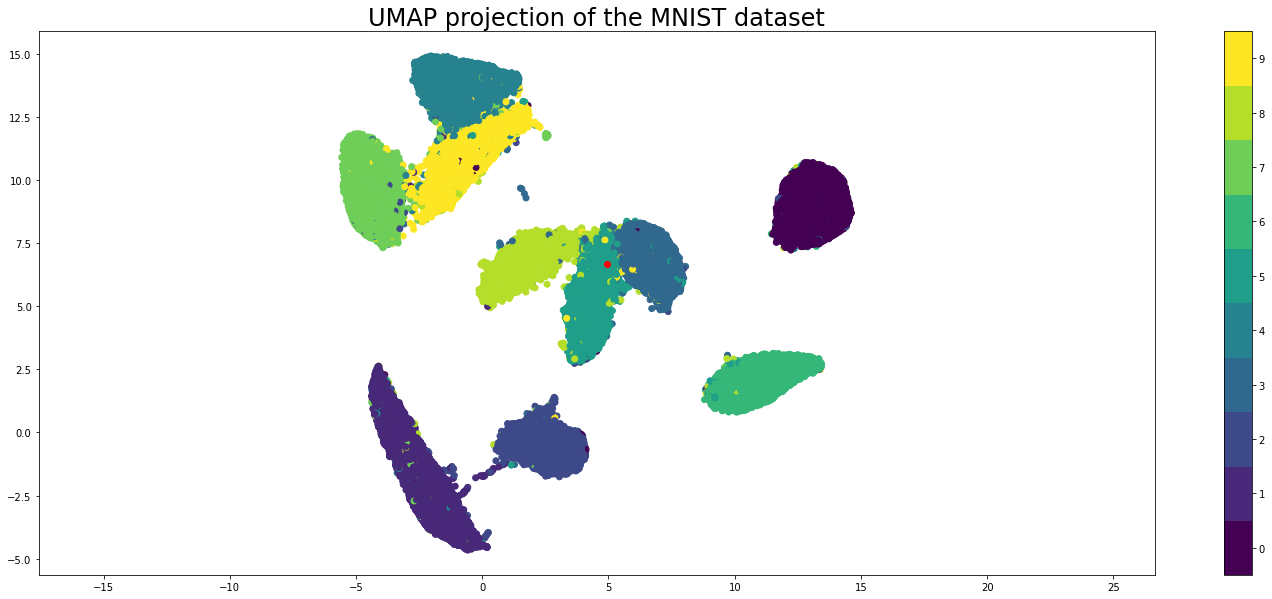

In [ ]:
plt.figure(figsize=[25,10])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.scatter(embedding[46244,0], embedding[46244,1],color='r')
plt.show()

Now that we have color coded the data points, it is easy to see that the data set clusters nicely acccording to numeric value. The random mnist image sample we plotted earlier is indicated by a red dot in the plot as well. Note that this point coincides with the color associated with number 5 in the colorbar as expected.

# Test with sample image

Suppose that you didn’t know what number corresponded with your image like we did in the past example. If you trained your UMAP reducer using a training dataset, you could use the reducer to transform new samples and evaluate its proximity to the clusters or cluster centroids.

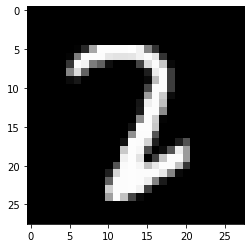

Expected value: 2


In [ ]:
# pick a random sample
sample = 4939

# - plot the sample image
fig = plt.figure
plt.imshow(X_test[sample], cmap='gray')
plt.show()

# print the expected numeric value
print('Expected value: ' + str(Y_test[sample]))

Lets run our sample data through the transform function to get an compressed representation of the image.

In [ ]:
# reshape the data to comply with UMAP reducer requirements
X_test_sample = X_test[sample].reshape((1,nx*ny))

# create an embedding using the fit_transform function. 
embedding_2 = reducer.transform(X_test_sample)

# display the embedding shape
print(np.shape(embedding_2))

(1, 2)


Lets plot the new embedding on top of the training data.

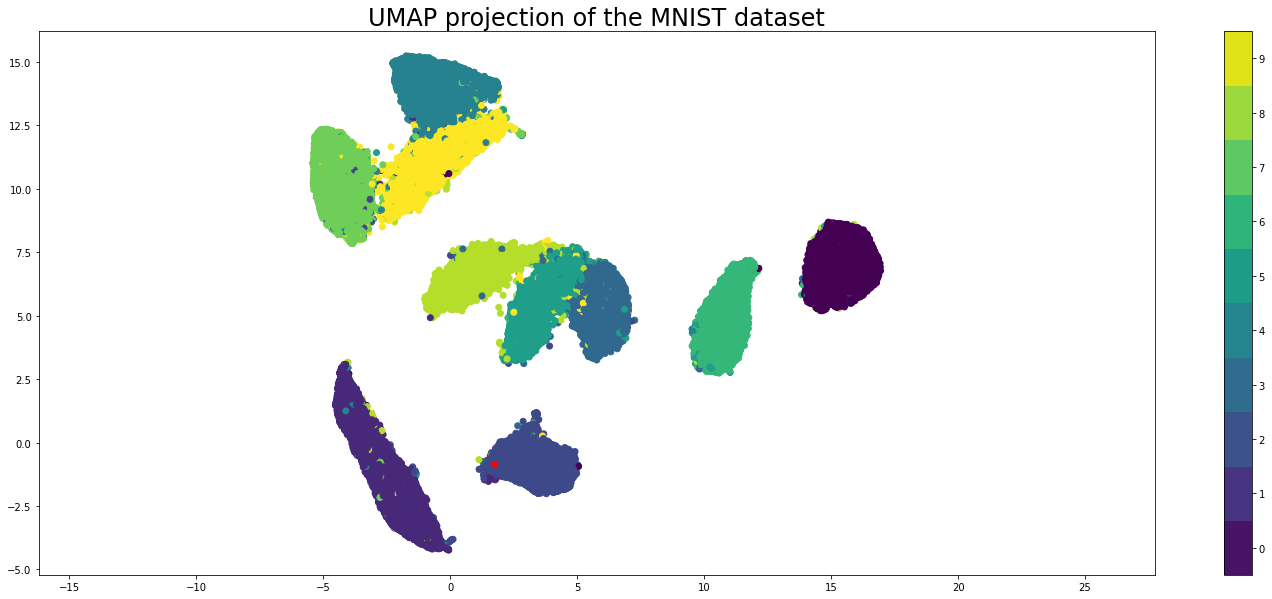

In [ ]:
# plot the training data and overlayed test sample
plt.figure(figsize=[25,10])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train
)
plt.scatter(
    embedding_2[:, 0],
    embedding_2[:, 1],
    color='r'
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

# 3D Embedding

Data compression to 2 dimensional space is not always feasible. Sometimes, such a compression results in too much lost information. To change the number of dimensions, you can use the n_components variable while defining the umap reducer. Lets look at the mnist digits as a 3d embedding as an example.

In [ ]:
# create a UMAP reducer that will compress the data
reducer3D = umap.UMAP(n_components=3)

# get information about number of samples, rows, and columns in the dataset. 
# note the shape of each variable in the output above 
nsamples, nx, ny = X_train.shape

# reshape the data to comply with UMAP reducer requirements
X_train_2 = X_train.reshape((nsamples,nx*ny))

# create an embedding using the fit_transform function. 
embedding3D = reducer3D.fit_transform(X_train_2)

# display the embedding shape
print(np.shape(embedding3D))

(60000, 3)


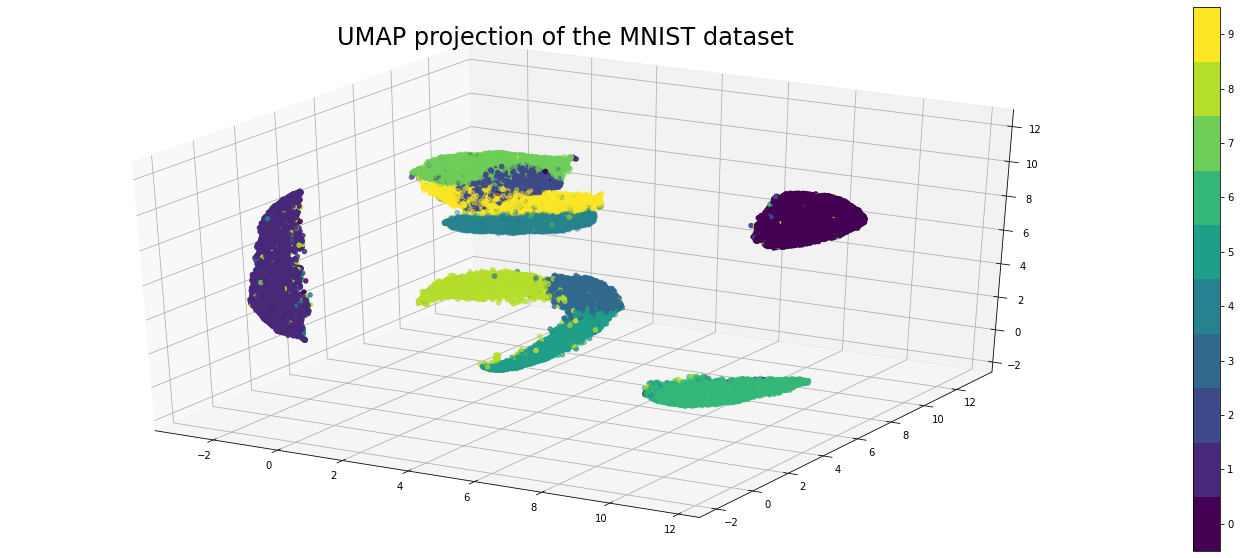

In [ ]:
# plot the training data and overlayed test sample
fig = plt.figure(figsize=[25,10])
ax = plt.axes(projection ="3d")
p = ax.scatter(
    embedding3D[:, 0],
    embedding3D[:, 1],
    embedding3D[:, 2],
    c=Y_train
)
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
fig.colorbar(p,boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()